# Problema #4

#### A continuación se muestra el mismo codigo presentado en el problema 1, sin embargo se realiza la siguiente modificación en los parametros para llamar la función con animos de correr simplex con las ecuaciones del sistema dual.



In [ ]:
# Modificación de parametros respecto a la primal solution

f_dual = [8, 12]  # b
A_dual = [[1, 3], [2, 2]]  # Traspuesta de A
b_dual = [4, 3]  # f

simplex(f_dual, A_dual, b_dual)

In [1]:
from tabulate import tabulate


def mostrarTabla(M, funcion, iteracion, n_var, n_eq):
    headers = (
        [f"x{i+1}" for i in range(n_var)] + [f"s{i+1}" for i in range(n_eq)] + ["b"]
    )
    print("Iteracion #" + str(iteracion))
    print(tabulate(M, headers=headers, tablefmt="fancy_grid"))
    print("Función objetivo:")
    print(tabulate([funcion], headers=headers, tablefmt="fancy_grid"))


def simplex(f, A, b):
    n_var = len(f)
    n_eq = len(b)

    M = []
    for i in range(n_eq):
        row = A[i] + [0] * n_eq + [b[i]]
        row[n_var + i] = 1
        M.append(row)

    funcion = [-x for x in f] + [0] * n_eq + [0]

    it = 1
    while True:
        index_to_loose = 0
        for j in range(1, len(funcion) - 1):
            if funcion[j] < funcion[index_to_loose]:
                index_to_loose = j

        if funcion[index_to_loose] >= 0:
            break

        index_to_tighten = None
        valueMin = 1e9
        for i in range(n_eq):
            if M[i][index_to_loose] > 0:
                if M[i][-1] / M[i][index_to_loose] < valueMin:
                    valueMin = M[i][-1] / M[i][index_to_loose]
                    index_to_tighten = i

        pivot_val = M[index_to_tighten][index_to_loose]
        M[index_to_tighten] = [x / pivot_val for x in M[index_to_tighten]]

        for i in range(n_eq):
            if i != index_to_tighten:
                ratio = M[i][index_to_loose]
                M[i] = [
                    M[i][j] - ratio * M[index_to_tighten][j] for j in range(len(M[0]))
                ]

        ratio = funcion[index_to_loose]
        funcion = [
            funcion[j] - ratio * M[index_to_tighten][j] for j in range(len(funcion))
        ]

        mostrarTabla(M, funcion, it, n_var, n_eq)
        it += 1

    sol = [0] * n_var
    for j in range(n_var):
        fila_donde_hay_var = -1

        for i in range(n_eq):
            if M[i][j] == 1 and all(M[k][j] == 0 for k in range(n_eq) if k != i):
                fila_donde_hay_var = i
                break

        if fila_donde_hay_var != -1:
            sol[j] = M[fila_donde_hay_var][-1]  # igual a valor libre

    print("Maximo: " + str(funcion[-1]))

    for i in range(n_var):
        print("x[" + str(i + 1) + "] = " + str(sol[i]))


# Para el presente programa se considera la ecuación Ax <= b.
# f representa los coeficientes de la funcion a maximizar
# de forma que el producto interno entre f y x, da el valor maximo.

# La implementación está basada en la explicación de simplex presente en
# https://www.youtube.com/watch?v=E72DWgKP_1Y
# por lo que los nombres de variables corresponden a tight/loose en lugar de
# basicas (y no), obedeciendo a nombres representativos frente a la interpretacion
# geometrica conversada en clase.

f = [4, 3]

A = [[1, 2], [3, 2]]
b = [8, 12]

simplex(f, A, b)

print()
print("—" * 50)
print()

f_dual = [8, 12]  # b
A_dual = [[1, 3], [2, 2]]  # Traspuesta de A
b_dual = [4, 3]  # f

simplex(f_dual, A_dual, b_dual)


Iteracion #1
╒══════╤══════════╤══════╤═══════════╤═════╕
│   x1 │       x2 │   s1 │        s2 │   b │
╞══════╪══════════╪══════╪═══════════╪═════╡
│    0 │ 1.33333  │    1 │ -0.333333 │   4 │
├──────┼──────────┼──────┼───────────┼─────┤
│    1 │ 0.666667 │    0 │  0.333333 │   4 │
╘══════╧══════════╧══════╧═══════════╧═════╛
Función objetivo:
╒══════╤═══════════╤══════╤═════════╤═════╕
│   x1 │        x2 │   s1 │      s2 │   b │
╞══════╪═══════════╪══════╪═════════╪═════╡
│    0 │ -0.333333 │    0 │ 1.33333 │  16 │
╘══════╧═══════════╧══════╧═════════╧═════╛
Iteracion #2
╒══════╤══════╤═══════╤═══════╤═════╕
│   x1 │   x2 │    s1 │    s2 │   b │
╞══════╪══════╪═══════╪═══════╪═════╡
│    0 │    1 │  0.75 │ -0.25 │   3 │
├──────┼──────┼───────┼───────┼─────┤
│    1 │    0 │ -0.5  │  0.5  │   2 │
╘══════╧══════╧═══════╧═══════╧═════╛
Función objetivo:
╒══════╤══════╤══════╤══════╤═════╕
│   x1 │   x2 │   s1 │   s2 │   b │
╞══════╪══════╪══════╪══════╪═════╡
│    0 │    0 │ 0.25 │ 1.25 │

#### Se observa que ambas funciones objetivos son maximizadas y se obtiene el mismo valor, por lo que se constata que existe una dualidad entre ellas. 

#### Las variables basicas son x1 y x2, las no basicas son s1 y s2 pues es un sistema de 2 ecuaciones. En el sistema dual se tienen y1, y2 como basicas y s1, s2 como no-basicas. En sintesís, lo que el programa muestra es que el valor optimo de la función objetivo es de 17, que se consigue con x1 = 2 y x2 = 3. En el problema asociado se consigue un valor de 0.25 para y1 y de 1.25 para y2.

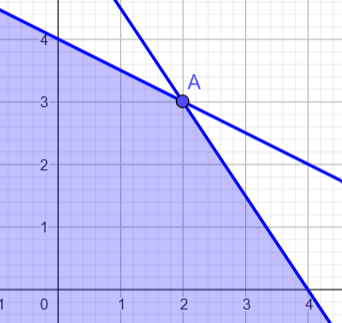

#### Teniendo en cuenta que es un problema con unicamente 2 variables se decidió graficar la región de busqueda, esta se muestra en la figura anterior. Se deben descartar los valores negativos pues por restricción implicita de simplex se tiene que x1, x2 >= 0. Por lo tanto, nos quedamos con un cuadrilatero y un vertice A que fue el punto seleccionado como optimo. El algoritmo de simplex nos dice que no solo el vertice puede ser el maximo sino que si uno de los vertices vecinos son optimos, entonces todos los puntos sobre la arista que une los puntos, tambien son optimos.

#### Para comprobarlo, evaluamos los vertices (4, 0) y (0, 4) en la funcion objetivo que da 16 y 12 respectivamente. De alli se concluye que solo hay un punto optimo. Adicionalmente se realiza el analisis de sensibilidad para x, este se realizó de manera tanteada revisando que los valores no se salieran de la solución base. El codigo es el siguiente, donde simplex sufre pequeñas modificaciones.

In [ ]:
from tabulate import tabulate
import numpy as np


def simplex(f, A, b):
    n_var = len(f)
    n_eq = len(b)

    M = []
    for i in range(n_eq):
        row = A[i] + [0] * n_eq + [b[i]]
        row[n_var + i] = 1
        M.append(row)

    funcion = [-x for x in f] + [0] * n_eq + [0]

    it = 1
    while True:
        index_to_loose = 0
        for j in range(1, len(funcion) - 1):
            if funcion[j] < funcion[index_to_loose]:
                index_to_loose = j

        if funcion[index_to_loose] >= 0:
            break

        index_to_tighten = None
        valueMin = 1e9
        for i in range(n_eq):
            if M[i][index_to_loose] > 0:
                if M[i][-1] / M[i][index_to_loose] < valueMin:
                    valueMin = M[i][-1] / M[i][index_to_loose]
                    index_to_tighten = i

        pivot_val = M[index_to_tighten][index_to_loose]
        M[index_to_tighten] = [x / pivot_val for x in M[index_to_tighten]]

        for i in range(n_eq):
            if i != index_to_tighten:
                ratio = M[i][index_to_loose]
                M[i] = [
                    M[i][j] - ratio * M[index_to_tighten][j] for j in range(len(M[0]))
                ]

        ratio = funcion[index_to_loose]
        funcion = [
            funcion[j] - ratio * M[index_to_tighten][j] for j in range(len(funcion))
        ]

        it += 1

    sol = [0] * n_var
    for j in range(n_var):
        fila_donde_hay_var = -1

        for i in range(n_eq):
            if M[i][j] == 1 and all(M[k][j] == 0 for k in range(n_eq) if k != i):
                fila_donde_hay_var = i
                break

        if fila_donde_hay_var != -1:
            sol[j] = M[fila_donde_hay_var][-1]  # igual a valor libre

    print(f, sol)

In [ ]:
f = [4, 3]

A = [[1, 2], [3, 2]]
b = [8, 12]

for i in np.arange(1.6, 4.5, 0.1): # valores para x1 > [1.6, 4.4] +- [0.1, 0.1]
    simplex([i, 3], A, b)

for i in np.arange(2.7, 8, 0.1):  # valores para x2 > [2.7, 7.9] +- [0.1, 0.1]
    simplex([4, i], A, b)


#### Como se puede observar x1 puede variar en el rango [1.6, 4.4] sin cambiar la solución, x2 puede variar en [2.7, 7.9]. Ambos rangos contemplan un margen de error de 0.1 Dentro de estos rangos las soluciones de x permanecen iguales, y lo unico que cambia es el valor de la función objetivo. 

#### Los precios sombra sirven para decir que si b[i] aumenta en una unidad, la funcion objetivo aumenta en y[i] unidades. Al ser y2 = 5*y1, se priorizaría poder aumentar b2, y se asignarían recursos en poder aumentarla. 